In [29]:
#Placement de ma base de donneés
import numpy as np
from sklearn.datasets import fetch_openml
X , y = fetch_openml(name = 'mnist_784' , version = 1 , return_X_y=True )
X = X.to_numpy()
X = X/255
y = y.to_numpy()
X[1].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [3]:

X3 = X[(y== '3')]
X4 = X[(y== '4')]

X34 = X[(y == '3') | (y =='4')]
y34 = y[(y =='3') | (y =='4')] 
X34.shape


(13965, 784)

In [31]:

#affichage des chiffres 3 et 4
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np
from skimage.feature import hog

fig , (ax1 , ax2)= plt.subplots (1,2 ,figsize =(16 , 4))

ax1.imshow(X3[0].reshape((28,28)))
ax1.set_title('image1')

ax2.imshow(X4[0].reshape((28,28)))
ax2.set_title('image2')

plt.show() 



ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [32]:
!pip install --upgrade scikit-image


In [6]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np

#classification binaire linéaire
X_train, X_test, y_train, y_test = train_test_split(X34, y34, test_size=0.5)


classifier = svm.SVC(kernel='linear')
classifier.fit(X_train , y_train)

y_est = classifier.predict( X_train)
classifier.score( X_train , y_train)

0.9998567745631625

In [28]:
!pip install scikit-image


In [ ]:
#Classification générique (rbf)

from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np




X_train, X_test, y_train, y_test = train_test_split(X34, y34, test_size=0.8)


classifier_rbf = svm.SVC(kernel='rbf')
classifier_rbf.fit(X_train , y_train)

y_est = classifier.predict( X_train)
classifier.score( X_train, y_train)

0.9957035445757251

In [13]:
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split


#comparatif des scores de classification rbf & linear

X_s = X[:5000]
y_s= y[:5000]

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2)

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train , y_train)

print("SVM linéaire :")
y_est = classifier.predict( X_test)
print("test : ",classifier.score( X_test, y_test))

y_est = classifier.predict( X_train)
print("Train : ",classifier.score( X_train, y_train))

classifier_rbf = svm.SVC(kernel='rbf')
classifier_rbf.fit(X_train , y_train)

print("\nSVM non linéaire (rbf) :")
y_est = classifier_rbf.predict( X_test)
print("Test : ",classifier_rbf.score( X_test, y_test))

y_est = classifier_rbf.predict( X_train)
print("Train : ",classifier_rbf.score( X_train, y_train))



SVM linéaire :
test :  0.909
Train :  1.0

SVM non linéaire (rbf) :
Test :  0.955
Train :  0.9875


In [24]:
#   Classification des representations HOG

fig , ax1= plt.subplots (1 ,figsize =(16 , 4))
vec = X[7].reshape((28 ,28))
ax1.imshow(vec)

plt.show()


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [26]:
from skimage.feature import hog

hog(vec,pixels_per_cell=(8, 8), cells_per_block=(2, 2) )

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [11]:
!pip install scikit-image

     |████████████████████████████████| 14.7 MB 4.8 MB/s            
     |████████████████████████████████| 3.6 MB 23.8 MB/s            
     |████████████████████████████████| 18.2 MB 47.1 MB/s            
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
     |████████████████████████████████| 222 kB 15.6 MB/s            
     |████████████████████████████████| 313 kB 49.4 MB/s            
     |████████████████████████████████| 36.6 MB 52.2 MB/s            
     |████████████████████████████████| 2.1 MB 40.9 MB/s            
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.2
    Uninstalling scipy-1.7.2:
      Successfully uninstalled scipy-1.7.2


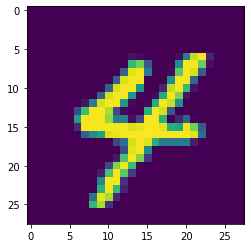

Test_rbf :  0.9925
Train_rbf :  1.0


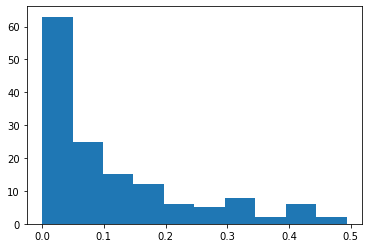

In [ ]:
from skimage . feature import hog
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np

#2.1

fig , ax1= plt.subplots (1 ,figsize =(16 , 4))

vec = X_34[27].reshape(28 ,28)
ax1.imshow(vec)

plt.show()


X_34 , y_34 = X_34[:1000] , y_34[:1000]

features = []

for i in range(1000):
    features.append(hog(X_34[i].reshape((28, 28)), pixels_per_cell=(8, 8), cells_per_block=(2, 2)))
    
X_hog = np.array(features)
plt.hist(X_hog[27])

X_train, X_test, y_train, y_test = train_test_split(X_hog,y , test_size=0.8)

classifier_rbf = svm.SVC(kernel='rbf')
classifier_rbf.fit(X_train , y_train)

y_est = classifier_rbf.predict( X_test)
print("Test_rbf : ",classifier_rbf.score( X_test, y_test))

y_est = classifier_rbf.predict( X_train)
print("Train_rbf : ",classifier_rbf.score( X_train, y_train))



In [ ]:
#Rechargeemnt de ma base de donneés
import numpy as np
from sklearn.datasets import fetch_openml
X , y = fetch_openml(name = 'mnist_784' , version = 1 , return_X_y=True )
X = X.to_numpy()
X = X/255
y = y.to_numpy()
X[1].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

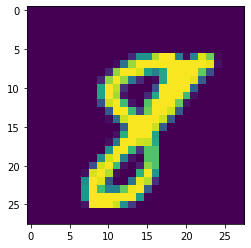

Test_rbf :  0.85875
Train_rbf :  0.96
Test_rbf :  0.8725
Train_rbf :  1.0


array([[0.00821244, 0.01077468, 0.04959459, ..., 0.02385833, 0.06117913,
        0.01046116],
       [0.87287091, 0.00790432, 0.01531777, ..., 0.01110508, 0.00825855,
        0.0222852 ],
       [0.02628923, 0.02887345, 0.03153433, ..., 0.19288253, 0.00578491,
        0.04872425],
       ...,
       [0.64572251, 0.06235156, 0.04796286, ..., 0.05692563, 0.02017015,
        0.01455353],
       [0.15354889, 0.00937945, 0.05211089, ..., 0.01664761, 0.01495354,
        0.0301381 ],
       [0.02739927, 0.05334334, 0.0128944 , ..., 0.01334559, 0.01958418,
        0.0102374 ]])

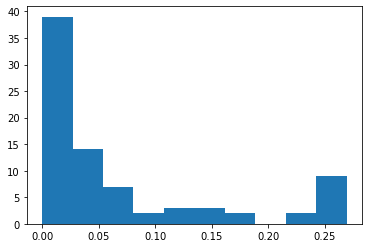

In [ ]:
#2.2

X , y = X[:1000] , y[:1000]

fig , ax1= plt.subplots (1 ,figsize =(16 , 4))

vec = X[55].reshape(28 ,28)
ax1.imshow(vec)

plt.show()

features = []

for i in range(1000):
    features.append(hog(X[i].reshape((28,28))))

X_hog = np.array(features)
plt.hist(X_hog[0])

 #2.2
X_train, X_test, y_train, y_test = train_test_split(X_hog,y , test_size=0.8)

classifier = svm.SVC(kernel='linear',probability=True)
classifier.fit(X_train , y_train)

y_est = classifier.predict( X_test)
print("Test_rbf : ",classifier.score( X_test, y_test))

y_est = classifier.predict( X_train)
print("Train_rbf : ",classifier.score( X_train, y_train))

classifier . predict_proba (X_hog)




classifier_rbf = svm.SVC(kernel='rbf',probability=True)
classifier_rbf.fit(X_train , y_train)

y_est = classifier_rbf.predict( X_test)
print("Test_rbf : ",classifier_rbf.score( X_test, y_test))

y_est = classifier_rbf.predict( X_train)
print("Train_rbf : ",classifier_rbf.score( X_train, y_train))

classifier . predict_proba (X_hog)

from skimage . feature import hog
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np


In [ ]:
# Classification kNN



"""Prendre trop de voisins : quand k est trop grand, le modele est trop simpliste
et ne capture pas suffisament de details pendant l'entrainement """

"""Prendre un seul voisin : (k = 1 ), le modele devient tres flexible il 
s'adapte trop etroitement et ne generalise pas """

"""Prendre un nombre impair ou premier nous eviteras les impasses pendant un 
vote vus quil est impaire il evite la parité donc pas d'egalité parfaite entre
les classes
un nombre premier a une meilleur résistance au bruit 
"""

"Prendre un nombre impair ou premier nous eviteras les impasses pendant un \nvote vus quil est impaire il evite la parité donc pas d'egalité parfaite entre\nles classes\nun nombre premier a une meilleur résistance au bruit \n"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

t_begin_knn = time.time()
#kNN
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_predictions)

t_end_knn = time.time()

t_begin_svm = time.time()
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
print(svm_predictions) 

t_end_svm = time.time()

t_knn = -t_begin_knn +t_end_knn
t_svm = -t_begin_svm + t_end_svm
print("temps Knn : ",t_knn,"temps Svm : ",t_svm)
#Svm est plus long pour classifier que le Knn 

['4' '8' '5' '4' '3' '7' '2' '9' '8' '8' '7' '4' '0' '1' '9' '8' '7' '0'
 '0' '9' '4' '2' '6' '1' '3' '4' '3' '8' '9' '4' '1' '2' '9' '5' '5' '4'
 '9' '1' '9' '6' '7' '0' '6' '0' '9' '6' '9' '8' '9' '4' '0' '5' '8' '7'
 '7' '7' '3' '4' '0' '1' '3' '6' '9' '5' '7' '9' '6' '1' '6' '1' '0' '9'
 '5' '1' '1' '0' '6' '0' '5' '7' '5' '3' '6' '7' '0' '9' '2' '9' '1' '7'
 '4' '2' '7' '9' '2' '7' '5' '1' '0' '3' '5' '1' '0' '2' '7' '1' '5' '3'
 '8' '4' '7' '0' '9' '8' '2' '2' '8' '8' '6' '9' '0' '3' '6' '7' '2' '2'
 '0' '1' '1' '8' '8' '2' '4' '4' '9' '3' '3' '4' '9' '9' '3' '9' '2' '4'
 '7' '8' '3' '8' '7' '2' '5' '9' '6' '1' '7' '5' '1' '1' '6' '6' '9' '7'
 '5' '1' '5' '6' '6' '1' '0' '1' '7' '4' '1' '2' '0' '7' '4' '4' '7' '1'
 '9' '5' '8' '8' '0' '9' '9' '6' '1' '2' '1' '2' '0' '8' '4' '5' '4' '2'
 '0' '2']
['4' '8' '5' '4' '3' '7' '2' '9' '8' '8' '7' '4' '2' '1' '9' '5' '4' '0'
 '0' '9' '4' '2' '6' '1' '3' '4' '3' '8' '9' '4' '2' '2' '9' '5' '5' '4'
 '9' '1' '9' '6' '7' '0' '6' '0' '9' '6' 

In [ ]:
# Évaluez les performances de kNN
print("kNN (n_neighbors=3) :")
print("Exactitude :", accuracy_score(y_test, knn_predictions))  #nombredepredictioncorrect/echantillons
print("Rapport de classification :")
print(classification_report(y_test, knn_predictions))


kNN (n_neighbors=3) :
Exactitude : 0.82
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.70      1.00      0.82        16
           2       0.95      0.78      0.86        27
           3       0.74      0.94      0.83        18
           4       0.74      0.89      0.81        19
           5       0.70      0.64      0.67        22
           6       0.89      0.94      0.92        18
           7       1.00      0.62      0.77        24
           8       0.87      0.76      0.81        17
           9       0.78      0.82      0.80        17

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.84      0.82      0.82       200



In [ ]:
# Évaluez les performances de SVM
print("SVM :")
print("Exactitude :", accuracy_score(y_test, svm_predictions))
print("Rapport de classification :")
print(classification_report(y_test, svm_predictions))

SVM :
Exactitude : 0.865
Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.73      1.00      0.84        16
           2       0.95      0.78      0.86        27
           3       0.83      0.83      0.83        18
           4       0.73      1.00      0.84        19
           5       0.86      0.86      0.86        22
           6       0.94      0.89      0.91        18
           7       0.94      0.71      0.81        24
           8       0.86      0.71      0.77        17
           9       0.94      0.94      0.94        17

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200



In [ ]:
proba_predictions_knn = knn_classifier.predict_proba(X_test)
print("Sortie de predict_proba() pour kNN (n_neighbors=1) :\n", proba_predictions_knn)

Sortie de predict_proba() pour kNN (n_neighbors=1) :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
"""CONCLUSION KNN / 
Avantages : 
-> plus facile a comprendre 
-> pas de phase d'entrainement
-> plus rapide
Inconvénients : 
-> Plus sensible au bruit
-> Calcul intensif
"""

"""CONCLUSION SVM /
Avantages : 
-> Efficace dans les espaces a grande dimension
-> Utilisation de facon multiple (avec/sans noyaux)
Inconvénients : 
-> obligation de trouver Les parametres optimaux
->Complecite pour des grands donnéé"""

"""Choix personel : 
Je dirais que c'est selon les cas meme si j'ai un petit penchant pour le knn 
le svm reste tres interessant""